In [158]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [159]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [160]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [161]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [162]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [163]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [164]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [165]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [166]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [167]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [168]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [169]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [170]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [171]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [172]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [173]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [174]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [175]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [176]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [177]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [178]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [179]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [180]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = combined_snli_df.drop(['True_Label'], axis=1).values
y_snli = combined_snli_df['True_Label'].values

# Features and Labels
X_mnli_matched = combined_mnli_matched_df.drop(['True_Label'], axis=1).values
y_mnli_matched = combined_mnli_matched_df['True_Label'].values

# Features and Labels
X_mnli_mismatched = combined_mnli_mismatched_df.drop(['True_Label'], axis=1).values
y_mnli_mismatched = combined_mnli_mismatched_df['True_Label'].values

# Features and Labels
X_anli_r1 = combined_anli_r1_df.drop(['True_Label'], axis=1).values
y_anli_r1 = combined_anli_r1_df['True_Label'].values

# Features and Labels
X_anli_r2 = combined_anli_r2_df.drop(['True_Label'], axis=1).values
y_anli_r2 = combined_anli_r2_df['True_Label'].values

# Features and Labels
X_anli_r3 = combined_anli_r3_df.drop(['True_Label'], axis=1).values
y_anli_r3 = combined_anli_r3_df['True_Label'].values


In [183]:
X_snli

array([[3.4766793e-02, 9.6259177e-01, 2.6414103e-03, ..., 8.6525280e-03,
        9.4743400e-01, 4.3913495e-02],
       [1.9208064e-03, 3.1903190e-01, 6.7904730e-01, ..., 7.4033150e-01,
        2.5643367e-01, 3.2348454e-03],
       [9.9878270e-01, 7.6433434e-04, 4.5297167e-04, ..., 4.6765395e-03,
        6.0480673e-02, 9.3484277e-01],
       ...,
       [9.9917114e-01, 4.9286430e-04, 3.3603658e-04, ..., 8.3751883e-04,
        2.6697412e-03, 9.9649280e-01],
       [2.6664520e-04, 2.1777824e-03, 9.9755560e-01, ..., 9.8434700e-01,
        1.5223468e-02, 4.2961346e-04],
       [3.6407644e-03, 9.9522394e-01, 1.1352752e-03, ..., 5.0470065e-03,
        9.9021820e-01, 4.7347180e-03]])

In [184]:
X_snli.shape

(9824, 9)

In [185]:
y_snli.shape

(9824,)

In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Feature Scaling
scaler = StandardScaler()

# Fit the scaler to each task's feature data
X_snli_scaled = scaler.fit_transform(X_snli)
X_mnli_matched_scaled = scaler.fit_transform(X_mnli_matched)
X_mnli_mismatched_scaled = scaler.fit_transform(X_mnli_mismatched)
X_anli_r1_scaled = scaler.fit_transform(X_anli_r1)
X_anli_r2_scaled = scaler.fit_transform(X_anli_r2)
X_anli_r3_scaled = scaler.fit_transform(X_anli_r3)

# Step 2: Label Encoding (One-Hot Encoding) - Updated to prevent FutureWarning
encoder = OneHotEncoder()  # No need to specify sparse=False, default is now dense output

# Encode the labels for each task
y_snli_encoded = encoder.fit_transform(y_snli.reshape(-1, 1))
y_mnli_matched_encoded = encoder.fit_transform(y_mnli_matched.reshape(-1, 1))
y_mnli_mismatched_encoded = encoder.fit_transform(y_mnli_mismatched.reshape(-1, 1))
y_anli_r1_encoded = encoder.fit_transform(y_anli_r1.reshape(-1, 1))
y_anli_r2_encoded = encoder.fit_transform(y_anli_r2.reshape(-1, 1))
y_anli_r3_encoded = encoder.fit_transform(y_anli_r3.reshape(-1, 1))


In [187]:
from sklearn.model_selection import train_test_split

# Define the test size and random state for reproducibility
test_size = 0.2
random_state = 42

# Split data for SNLI task
X_snli_train, X_snli_test, y_snli_train, y_snli_test = train_test_split(
    X_snli_scaled, y_snli_encoded, test_size=test_size, random_state=random_state
)

# Split data for MNLI-matched task
X_mnli_matched_train, X_mnli_matched_test, y_mnli_matched_train, y_mnli_matched_test = train_test_split(
    X_mnli_matched_scaled, y_mnli_matched_encoded, test_size=test_size, random_state=random_state
)

# Split data for MNLI-mismatched task
X_mnli_mismatched_train, X_mnli_mismatched_test, y_mnli_mismatched_train, y_mnli_mismatched_test = train_test_split(
    X_mnli_mismatched_scaled, y_mnli_mismatched_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 1 task
X_anli_r1_train, X_anli_r1_test, y_anli_r1_train, y_anli_r1_test = train_test_split(
    X_anli_r1_scaled, y_anli_r1_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 2 task
X_anli_r2_train, X_anli_r2_test, y_anli_r2_train, y_anli_r2_test = train_test_split(
    X_anli_r2_scaled, y_anli_r2_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 3 task
X_anli_r3_train, X_anli_r3_test, y_anli_r3_train, y_anli_r3_test = train_test_split(
    X_anli_r3_scaled, y_anli_r3_encoded, test_size=test_size, random_state=random_state
)

In [188]:
X_snli_train.shape

(7859, 9)

In [189]:
X_anli_r2_train.shape

(800, 9)

In [190]:
X_anli_r3_train.shape

(960, 9)

In [191]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Adjusted Capsule Layer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, dim_capsules, num_routing=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsules = dim_capsules
        self.num_routing = num_routing
    
    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.num_capsules * self.dim_capsules),
            initializer="glorot_uniform",
            name="capsule_kernel",
        )
    
    def call(self, inputs):
        outputs = tf.matmul(inputs, self.kernel)
        outputs = tf.reshape(outputs, (-1, self.num_capsules, self.dim_capsules))
        
        b = tf.zeros(shape=(tf.shape(inputs)[0], self.num_capsules, 1))
        for _ in range(self.num_routing):
            c = tf.nn.softmax(b, axis=1)
            outputs = c * outputs
            outputs = self.squash(outputs)
            b += tf.reduce_sum(outputs * outputs, axis=-1, keepdims=True)
        
        return outputs
    
    @staticmethod
    def squash(vector):
        squared_norm = tf.reduce_sum(tf.square(vector), axis=-1, keepdims=True)
        scale = squared_norm / (1 + squared_norm) / tf.sqrt(squared_norm)
        return scale * vector


In [192]:
# Ensure Data is in Correct Format
def ensure_dense(data):
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

# Apply Data Conversion and Reshaping for Other Tasks
X_snli_train = ensure_dense(X_snli_train)
X_snli_test = ensure_dense(X_snli_test)
y_snli_train = ensure_dense(y_snli_train)
y_snli_test = ensure_dense(y_snli_test)

# Apply Data Conversion and Reshaping for Other Tasks
X_mnli_matched_train = ensure_dense(X_mnli_matched_train)
X_mnli_matched_test = ensure_dense(X_mnli_matched_test)
y_mnli_matched_train = ensure_dense(y_mnli_matched_train)
y_mnli_matched_test = ensure_dense(y_mnli_matched_test)

X_mnli_mismatched_train = ensure_dense(X_mnli_mismatched_train)
X_mnli_mismatched_test = ensure_dense(X_mnli_mismatched_test)
y_mnli_mismatched_train = ensure_dense(y_mnli_mismatched_train)
y_mnli_mismatched_test = ensure_dense(y_mnli_mismatched_test)

X_anli_r1_train = ensure_dense(X_anli_r1_train)
X_anli_r1_test = ensure_dense(X_anli_r1_test)
y_anli_r1_train = ensure_dense(y_anli_r1_train)
y_anli_r1_test = ensure_dense(y_anli_r1_test)

X_anli_r2_train = ensure_dense(X_anli_r2_train)
X_anli_r2_test = ensure_dense(X_anli_r2_test)
y_anli_r2_train = ensure_dense(y_anli_r2_train)
y_anli_r2_test = ensure_dense(y_anli_r2_test)

X_anli_r3_train = ensure_dense(X_anli_r3_train)
X_anli_r3_test = ensure_dense(X_anli_r3_test)
y_anli_r3_train = ensure_dense(y_anli_r3_train)
y_anli_r3_test = ensure_dense(y_anli_r3_test)

In [193]:
# Function to reshape 1D arrays into 2D if needed
def ensure_reshaped(data):
    if len(data.shape) == 1:
        return data.reshape((-1, 1))
    return data

# Reshape the training and test sets for all tasks
# SNLI
X_snli_train = ensure_reshaped(X_snli_train)
X_snli_test = ensure_reshaped(X_snli_test)

# Reshape the training and test sets for all tasks
# MNLI Matched
X_mnli_matched_train = ensure_reshaped(X_mnli_matched_train)
X_mnli_matched_test = ensure_reshaped(X_mnli_matched_test)

# MNLI Mismatched
X_mnli_mismatched_train = ensure_reshaped(X_mnli_mismatched_train)
X_mnli_mismatched_test = ensure_reshaped(X_mnli_mismatched_test)

# ANLI Round 1
X_anli_r1_train = ensure_reshaped(X_anli_r1_train)
X_anli_r1_test = ensure_reshaped(X_anli_r1_test)

# ANLI Round 2
X_anli_r2_train = ensure_reshaped(X_anli_r2_train)
X_anli_r2_test = ensure_reshaped(X_anli_r2_test)

# ANLI Round 3
X_anli_r3_train = ensure_reshaped(X_anli_r3_train)
X_anli_r3_test = ensure_reshaped(X_anli_r3_test)

# Reshape the labels as well if required
y_mnli_matched_train = ensure_reshaped(y_mnli_matched_train)
y_mnli_matched_test = ensure_reshaped(y_mnli_matched_test)

y_mnli_mismatched_train = ensure_reshaped(y_mnli_mismatched_train)
y_mnli_mismatched_test = ensure_reshaped(y_mnli_mismatched_test)

y_anli_r1_train = ensure_reshaped(y_anli_r1_train)
y_anli_r1_test = ensure_reshaped(y_anli_r1_test)

y_anli_r2_train = ensure_reshaped(y_anli_r2_train)
y_anli_r2_test = ensure_reshaped(y_anli_r2_test)

y_anli_r3_train = ensure_reshaped(y_anli_r3_train)
y_anli_r3_test = ensure_reshaped(y_anli_r3_test)

In [194]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Function to create a simple dense model with regularization
def create_simple_dense_model(input_shape, num_classes):
    inputs = keras.Input(shape=(input_shape,))
    dense_layer = layers.Dense(64, activation='relu')(inputs)  # Simplified model
    dropout_layer = layers.Dropout(0.2)(dense_layer)  # Reduced dropout
    dense_layer_2 = layers.Dense(32, activation='relu')(dropout_layer)
    outputs = layers.Dense(num_classes, activation='softmax')(dense_layer_2)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Function to train and evaluate the model, returning history, test loss/accuracy, and the trained model
def train_and_evaluate(X_train, y_train, X_test, y_test, epochs=20, batch_size=32):
    model = create_simple_dense_model(
        input_shape=X_train.shape[1],  # Input feature count
        num_classes=y_train.shape[1],  # Number of output classes
    )
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Set learning rate
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks for early stopping and learning rate adjustment
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
    
    # Fit the model with validation data and callbacks
    history = model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=callbacks
    )
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    
    # Return history, test loss, test accuracy, and the model
    return history, test_loss, test_accuracy, model

In [195]:
import matplotlib.pyplot as plt

# Function to plot training/validation accuracy and loss from history
def plot_training_history(history, title_prefix="Model"):
    # Create subplots for accuracy and loss
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot (training and validation)
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
    axes[0].set_title(f'{title_prefix} - Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Loss plot (training and validation)
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    axes[1].set_title(f'{title_prefix} - Training and Validation Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [196]:
# Call the function for a specific task (example: snli)
history_snli, test_loss_snli, test_accuracy_snli, trained_model_snli = train_and_evaluate(
    X_snli_train, y_snli_train, X_snli_test, y_snli_test, epochs=20, batch_size=32
)

print("Test loss on SNLI:", test_loss_snli)
print("Test accuracy on SNLI:", test_accuracy_snli)

# Now you can use `history` to plot the training and validation loss/accuracy over epochs


Epoch 1/20
 94/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7174 - loss: 0.8459

I0000 00:00:1713870742.615098      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713870742.631548      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8166 - loss: 0.6149

W0000 00:00:1713870745.561564      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/246 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8169 - loss: 0.6140 - val_accuracy: 0.9318 - val_loss: 0.2218 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9224 - loss: 0.2406 - val_accuracy: 0.9323 - val_loss: 0.2139 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9238 - loss: 0.2398 - val_accuracy: 0.9313 - val_loss: 0.2126 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9230 - loss: 0.2393 - val_accuracy: 0.9318 - val_loss: 0.2105 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9266 - loss: 0.2211 - val_accuracy: 0.9328 - val_loss: 0.2094 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.2195 - val_accuracy: 0.9328 - val_loss: 0.2079 - learning_rate: 5.0000e-04
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9274 - l

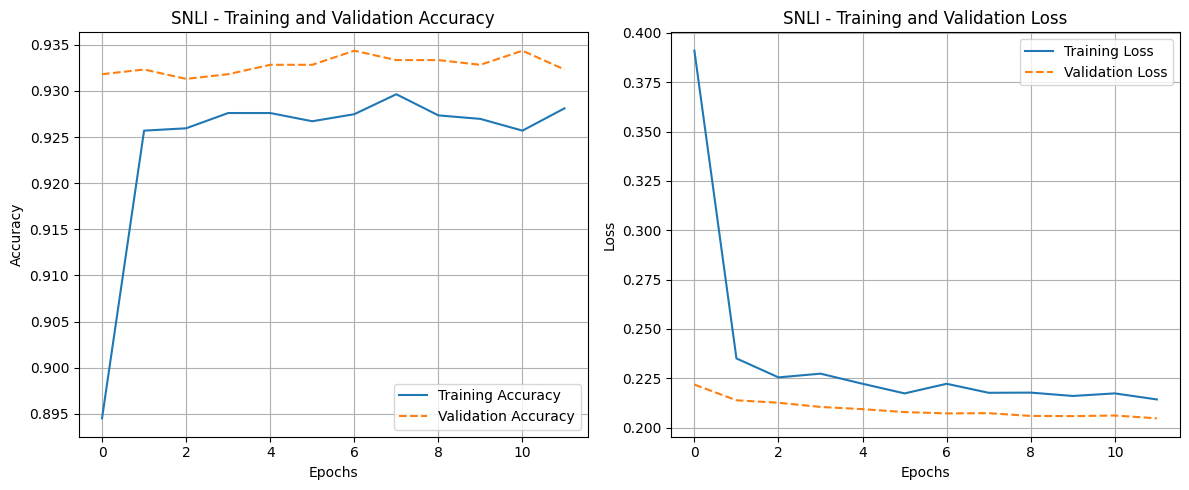

In [197]:
# MNLI Matched
plot_training_history(history_snli, title_prefix="SNLI")

In [198]:
# Call the function for a specific task (example: MNLI matched)
history_mnli_matched, test_loss_mnli_matched, test_accuracy_mnli_matched, trained_model_mnli_matched = train_and_evaluate(
    X_mnli_matched_train, y_mnli_matched_train, X_mnli_matched_test, y_mnli_matched_test, epochs=20, batch_size=32
)

print("Test loss on MNLI-m:", test_loss_mnli_matched)
print("Test accuracy on MNLI-m:", test_accuracy_mnli_matched)

# Now you can use `history` to plot the training and validation loss/accuracy over epochs


Epoch 1/20
 98/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4869 - loss: 1.0213

W0000 00:00:1713870754.751744      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6636 - loss: 0.7441

W0000 00:00:1713870757.464144      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6643 - loss: 0.7429 - val_accuracy: 0.9195 - val_loss: 0.2350 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9190 - loss: 0.2639 - val_accuracy: 0.9200 - val_loss: 0.2277 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9216 - loss: 0.2417 - val_accuracy: 0.9221 - val_loss: 0.2247 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.2593 - val_accuracy: 0.9221 - val_loss: 0.2206 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2465 - val_accuracy: 0.9200 - val_loss: 0.2190 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9146 - loss: 0.2554 - val_accuracy: 0.9200 - val_loss: 0.2177 - learning_rate: 5.0000e-04
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - l

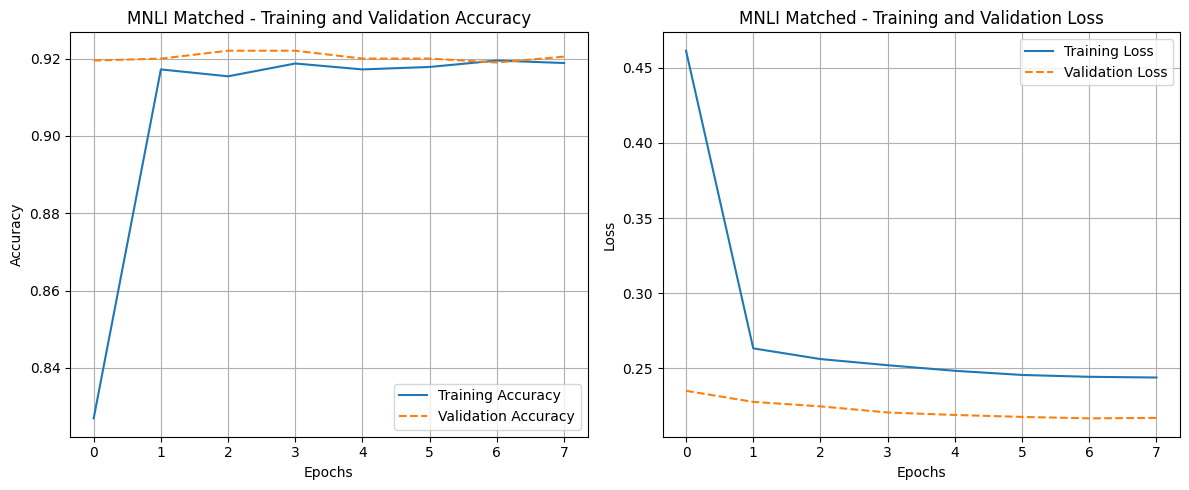

In [199]:
# MNLI Matched
plot_training_history(history_mnli_matched, title_prefix="MNLI Matched")



In [200]:
# Call the function for MNLI mismatched
history_mnli_mismatched, test_loss_mnli_mismatched, test_accuracy_mnli_mismatched, trained_model_mnli_mismatched = train_and_evaluate(
    X_mnli_mismatched_train, y_mnli_mismatched_train, X_mnli_mismatched_test, y_mnli_mismatched_test, epochs=20, batch_size=32
)

print("Test loss on MNLI-mm:", test_loss_mnli_mismatched)
print("Test accuracy on MNLI-mm:", test_accuracy_mnli_mismatched)

Epoch 1/20
 98/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6957 - loss: 0.7819

W0000 00:00:1713870764.662738      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7977 - loss: 0.5764

W0000 00:00:1713870767.802393      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7980 - loss: 0.5756 - val_accuracy: 0.9156 - val_loss: 0.2562 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.2579 - val_accuracy: 0.9156 - val_loss: 0.2511 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9152 - loss: 0.2575 - val_accuracy: 0.9207 - val_loss: 0.2469 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9200 - loss: 0.2456 - val_accuracy: 0.9202 - val_loss: 0.2445 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.2571 - val_accuracy: 0.9212 - val_loss: 0.2424 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.2505 - val_accuracy: 0.9202 - val_loss: 0.2418 - learning_rate: 5.0000e-04
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9193 - l

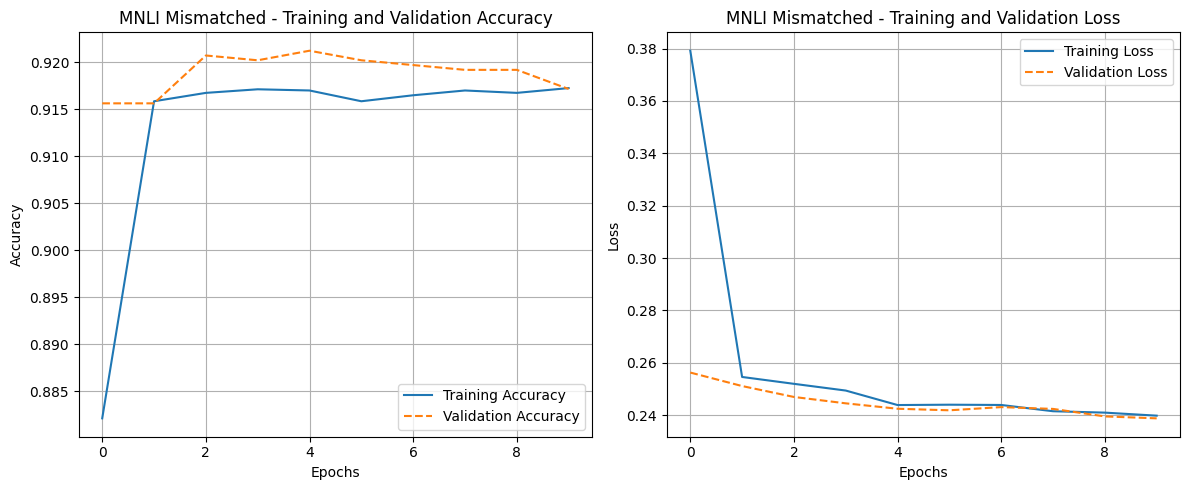

In [201]:
# MNLI Mismatched
plot_training_history(history_mnli_mismatched, title_prefix="MNLI Mismatched")


In [202]:
# Call the function for ANLI round 1
history_anli_r1, test_loss_anli_r1, test_accuracy_anli_r1, trained_model_anli_r1 = train_and_evaluate(
    X_anli_r1_train, y_anli_r1_train, X_anli_r1_test, y_anli_r1_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R1:", test_loss_anli_r1)
print("Test accuracy on ANLI R1:", test_accuracy_anli_r1)

Epoch 1/20
 1/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1875 - loss: 1.1796

W0000 00:00:1713870776.129878      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713870776.513635      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2402 - loss: 1.1427 - val_accuracy: 0.6300 - val_loss: 0.9776 - learning_rate: 5.0000e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6500 - loss: 0.9275 - val_accuracy: 0.7050 - val_loss: 0.8727 - learning_rate: 5.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7721 - loss: 0.7871 - val_accuracy: 0.7100 - val_loss: 0.8075 - learning_rate: 5.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7607 - loss: 0.6984 - val_accuracy: 0.7150 - val_loss: 0.7760 - learning_rate: 5.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7502 - loss: 0.6652 - val_accuracy: 0.7200 - val_loss: 0.7692 - learning_rate: 5.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7673 - loss: 0.6186 - val_accuracy: 0.7150 - val_loss: 0.7580 - learning_rate: 5.0000e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7573 - loss: 0.6094 - 

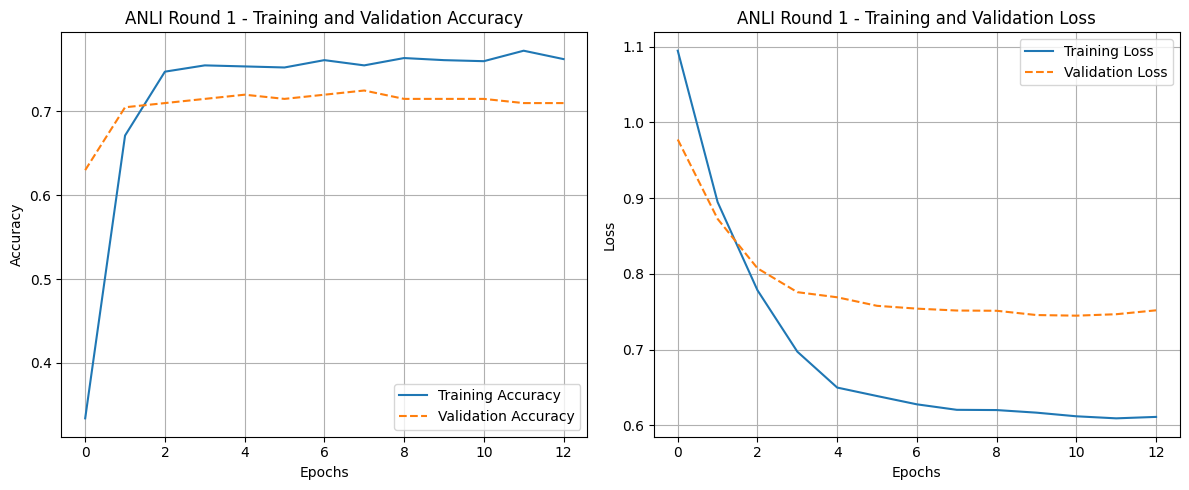

In [203]:
# ANLI Round 1
plot_training_history(history_anli_r1, title_prefix="ANLI Round 1")

In [204]:
# Call the function for ANLI round 2
history_anli_r2, test_loss_anli_r2, test_accuracy_anli_r2, trained_model_anli_r2 = train_and_evaluate(
    X_anli_r2_train, y_anli_r2_train, X_anli_r2_test, y_anli_r2_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R2:", test_loss_anli_r2)
print("Test accuracy on ANLI R2:", test_accuracy_anli_r2)

Epoch 1/20
 1/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3125 - loss: 1.0872

W0000 00:00:1713870781.097478      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3874 - loss: 1.0774 - val_accuracy: 0.6200 - val_loss: 0.9762 - learning_rate: 5.0000e-04
Epoch 2/20
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5625 - loss: 0.9553

W0000 00:00:1713870781.510835      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5895 - loss: 0.9551 - val_accuracy: 0.7100 - val_loss: 0.8810 - learning_rate: 5.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6340 - loss: 0.8636 - val_accuracy: 0.7150 - val_loss: 0.8203 - learning_rate: 5.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6237 - loss: 0.8758 - val_accuracy: 0.7250 - val_loss: 0.7914 - learning_rate: 5.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 0.7975 - val_accuracy: 0.7300 - val_loss: 0.7720 - learning_rate: 5.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 0.7904 - val_accuracy: 0.7300 - val_loss: 0.7639 - learning_rate: 5.0000e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 0.8266 - val_accuracy: 0.7450 - val_loss: 0.7572 - learning_rate: 5.0000e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6553 - loss: 0.7718 - v

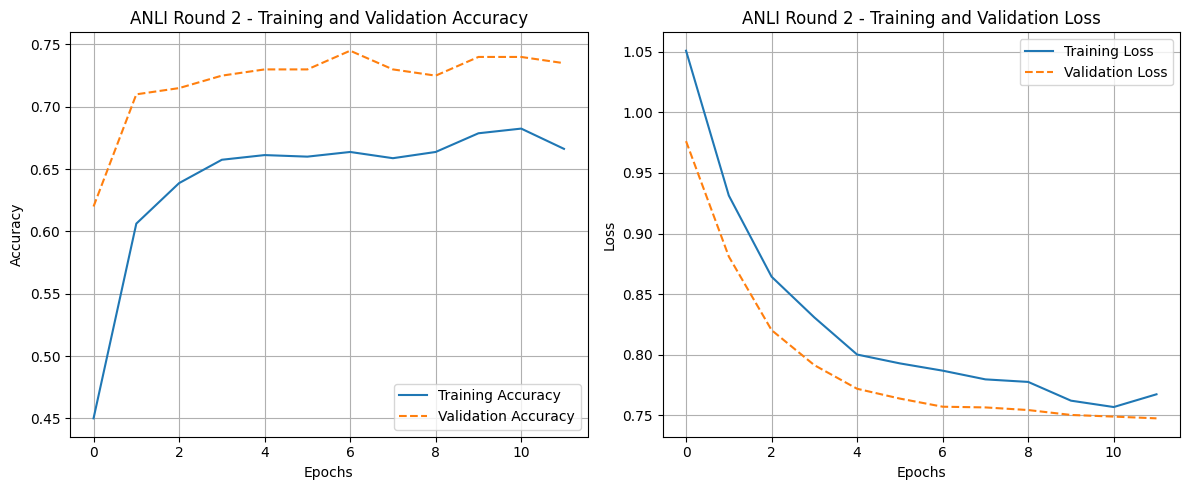

In [205]:
# ANLI Round 2
plot_training_history(history_anli_r2, title_prefix="ANLI Round 2")

In [206]:
# Call the function for ANLI round 3
history_anli_r3, test_loss_anli_r3, test_accuracy_anli_r3, trained_model_anli_r3 = train_and_evaluate(
    X_anli_r3_train, y_anli_r3_train, X_anli_r3_test, y_anli_r3_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R3:", test_loss_anli_r3)
print("Test accuracy on ANLI R3:", test_accuracy_anli_r3)

Epoch 1/20
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1:03 2s/step - accuracy: 0.1875 - loss: 1.2180

W0000 00:00:1713870785.653214      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713870786.045356      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4182 - loss: 1.0812 - val_accuracy: 0.6625 - val_loss: 0.8941 - learning_rate: 5.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5957 - loss: 0.9291 - val_accuracy: 0.6833 - val_loss: 0.7941 - learning_rate: 5.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6485 - loss: 0.8373 - val_accuracy: 0.6875 - val_loss: 0.7402 - learning_rate: 5.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6326 - loss: 0.8323 - val_accuracy: 0.7125 - val_loss: 0.7161 - learning_rate: 5.0000e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6500 - loss: 0.7934 - val_accuracy: 0.6958 - val_loss: 0.7004 - learning_rate: 5.0000e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6514 - loss: 0.7941 - val_accuracy: 0.6875 - val_loss: 0.6964 - learning_rate: 5.0000e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6646 - loss: 0.7789 - 

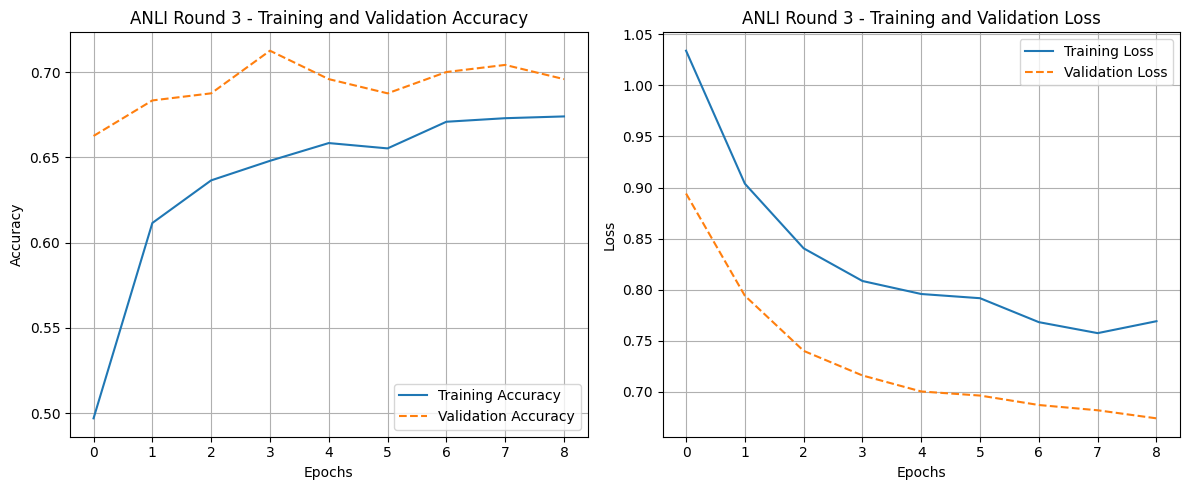

In [207]:
# ANLI Round 3
plot_training_history(history_anli_r3, title_prefix="ANLI Round 3")

In [208]:
from sklearn.model_selection import train_test_split

# Concatenate the training data for X and y from all tasks
X_combined = np.concatenate([X_snli, X_mnli_matched, X_mnli_mismatched, X_anli_r1, X_anli_r2, X_anli_r3])
y_combined = np.concatenate([y_snli, y_mnli_matched, y_mnli_mismatched, y_anli_r1, y_anli_r2, y_anli_r3])

# Fit the scaler to each task's feature data
X_combined_scaled = scaler.fit_transform(X_combined)
y_combined_encoded = encoder.fit_transform(y_combined.reshape(-1, 1))

# Define the test size and random state for reproducibility
test_size = 0.2
random_state = 42

# Split data for SNLI task
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(
    X_combined_scaled, y_combined_encoded, test_size=test_size, random_state=random_state
)


# Apply Data Conversion and Reshaping for Other Tasks
X_combined_train = ensure_dense(X_combined_train)
X_combined_test = ensure_dense(X_combined_test)
y_combined_train = ensure_dense(y_combined_train)
y_combined_test = ensure_dense(y_combined_test)

# combined
X_combined_train = ensure_reshaped(X_combined_train)
X_combined_test = ensure_reshaped(X_combined_test)



# Call the function for a specific task (example: snli)
history_combined, test_loss_combined, test_accuracy_combined, trained_model_combined = train_and_evaluate(
    X_combined_train, y_combined_train, X_combined_test, y_combined_test, epochs=20, batch_size=32
)

print("Test loss on Combined tasks:", test_loss_combined)
print("Test accuracy on Combined tasks:", test_accuracy_combined)

Epoch 1/20
 94/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7471 - loss: 0.6351

W0000 00:00:1713870790.200110      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8646 - loss: 0.3986

W0000 00:00:1713870794.220225      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


817/817 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8646 - loss: 0.3985 - val_accuracy: 0.8944 - val_loss: 0.3050 - learning_rate: 5.0000e-04
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8989 - loss: 0.2993 - val_accuracy: 0.8920 - val_loss: 0.3024 - learning_rate: 5.0000e-04
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8967 - loss: 0.2984 - val_accuracy: 0.8932 - val_loss: 0.2984 - learning_rate: 5.0000e-04
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8952 - loss: 0.2952 - val_accuracy: 0.8933 - val_loss: 0.2975 - learning_rate: 5.0000e-04
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8954 - loss: 0.3000 - val_accuracy: 0.8933 - val_loss: 0.2963 - learning_rate: 5.0000e-04
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8980 - loss: 0.2960 - val_accuracy: 0.8933 - val_loss: 0.2945 - learning_rate: 5.0000e-04
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9029 - loss: 0.2819


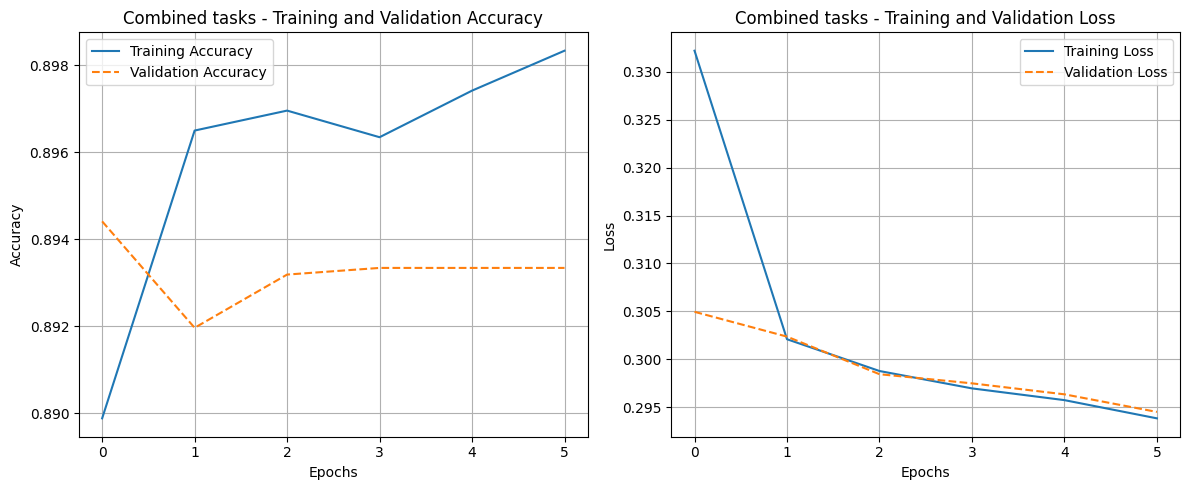

In [209]:
# combined
plot_training_history(history_combined, title_prefix="Combined tasks")

In [210]:
# After training the model
trained_model_combined.save('CapsuleNet_simple_ensemble.h5')  # Saves the model in HDF5 format